In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [4]:
df = pd.read_csv('./data/cleaned_data.csv')

In [5]:
df = df.drop(['Unnamed: 0'], axis=1)

ValueError: labels ['Unnamed: 0'] not contained in axis

In [15]:
df.head()

,call_number,unit_id,incident_number,call_type,call_date,watch_date,received_timestamp,entry_timestamp,dispatch_timestamp,response_timestamp,...,fire_prevention_district,supervisor_district,neighborhood_district,location,row_id,latitude,longitude,response_time,received_time_seconds,day
0,180243072,84,18010216,Medical Incident,2018-01-24,2018-01-24,2018-01-24 17:36:16.000000 UTC,2018-01-24 17:38:21.000000 UTC,2018-01-24 17:39:41.000000 UTC,2018-01-24 17:39:45.000000 UTC,...,7,1,NaN,"(37.77444199483868, -122.5046792231959)",180243072-84,37.774442,-122.504679,<function response_time at 0x10fbafcf8>,63376,24
1,180240538,61,18010011,Medical Incident,2018-01-24,2018-01-23,2018-01-24 07:05:05.000000 UTC,2018-01-24 07:05:05.000000 UTC,2018-01-24 07:05:31.000000 UTC,2018-01-24 07:05:45.000000 UTC,...,2,6,NaN,"(37.774094856688166, -122.42000143696421)",180240538-61,37.774095,-122.420001,<function response_time at 0x10fbafcf8>,25505,24
2,180240176,E22,18009959,Medical Incident,2018-01-24,2018-01-23,2018-01-24 02:04:21.000000 UTC,2018-01-24 02:05:37.000000 UTC,2018-01-24 02:06:04.000000 UTC,2018-01-24 02:07:26.000000 UTC,...,8,7,NaN,"(37.75521795168784, -122.47554039050351)",180240176-E22,37.755218,-122.475540,<function response_time at 0x10fbafcf8>,7461,24
3,180243588,E03,18010271,Alarms,2018-01-24,2018-01-24,2018-01-24 20:04:15.000000 UTC,2018-01-24 20:05:12.000000 UTC,2018-01-24 20:05:24.000000 UTC,2018-01-24 20:05:36.000000 UTC,...,4,2,NaN,"(37.79031930341935, -122.4231629067995)",180243588-E03,37.790319,-122.423163,<function response_time at 0x10fbafcf8>,72255,24
4,180243590,B03,18010272,Alarms,2018-01-24,2018-01-24,2018-01-24 20:03:08.000000 UTC,2018-01-24 20:05:36.000000 UTC,2018-01-24 20:05:57.000000 UTC,2018-01-24 20:06:56.000000 UTC,...,3,6,NaN,"(37.77732776352611, -122.39308855968541)",180243590-B03,37.777328,-122.393089,<function response_time at 0x10fbafcf8>,72188,24


In [13]:
plt.figure(figsize=(40, 10))
by_zipcode = df.groupby(['zipcode_of_incident'])
y_pos = np.arange(len(by_zipcode))
zipcode_response_times = by_zipcode['response_time'].mean()
plt.title('Response Time by Zipcode')
fig = plt.bar(y_pos, zipcode_response_times, align='center')
plt.xticks(y_pos, by_zipcode.groups.keys())
plt.ylabel('Response Time')
plt.xlabel('Zipcode of Incident')

DataError: No numeric types to aggregate

In [6]:
def parse_time(time):
    '''
    Parses time string, returns a datetime object
    '''
    f = "%Y-%m-%d %H:%M:%S.%f"
    return datetime.strptime(time[:-4], f)

In [27]:
def response_time(x):
    '''
    Takes in row in the dataframe, returns response time in seconds.
    '''
    if type(x.on_scene_timestamp) == float: return float('nan')
    return (parse_time(x.on_scene_timestamp)-parse_time(x.received_timestamp)).total_seconds()


In [8]:
def to_seconds(x):
    x = parse_time(x)
    return x.hour*3600 + x.minute*60 + x.second

In [28]:
df['response_time'] = df.apply(response_time, axis=1)

<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'float'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'float'>


TypeError: ("'float' object has no attribute '__getitem__'", u'occurred at index 19')

In [6]:
df['day'] = df.apply(lambda x: parse_time(x.dispatch_timestamp).day, axis=1)

In [8]:
np.max(days)

25

In [9]:
np.min(days)

13

In [11]:
df.to_csv('./data/cleaned_data.csv', index_label=False)

In [8]:
'''
Extracts the different call-types.
'''
ct = df.groupby(['call_type'])
ct.groups.keys()

['Structure Fire',
 'Vehicle Fire',
 'HazMat',
 'Fuel Spill',
 'Outside Fire',
 'Elevator / Escalator Rescue',
 'Citizen Assist / Service Call',
 'Medical Incident',
 'Water Rescue',
 'Electrical Hazard',
 'Other',
 'Alarms',
 'Smoke Investigation (Outside)',
 'Train / Rail Incident',
 'Gas Leak (Natural and LP Gases)',
 'Odor (Strange / Unknown)',
 'Traffic Collision']

In [121]:
by_zipcode = df.groupby(['zipcode_of_incident'])
y_pos = np.arange(len(by_zipcode))
zipcode_response_times = by_zipcode['response_time'].mean()

Text(0.5,0,u'Zipcode of Incident')

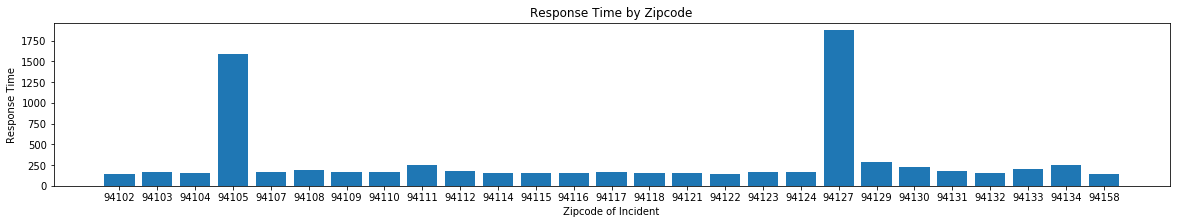

In [123]:
plt.figure(figsize=(20, 3))
plt.title('Response Time by Zipcode')
plt.bar(y_pos, zipcode_response_times, align='center')
plt.xticks(y_pos, by_zipcode.groups.keys())
plt.ylabel('Response Time')
plt.xlabel('Zipcode of Incident')

In [124]:
by_call_type = df.groupby(['call_type'])
by_call_type.groups.keys()

['Structure Fire',
 'Vehicle Fire',
 'HazMat',
 'Fuel Spill',
 'Outside Fire',
 'Elevator / Escalator Rescue',
 'Citizen Assist / Service Call',
 'Medical Incident',
 'Water Rescue',
 'Electrical Hazard',
 'Other',
 'Alarms',
 'Smoke Investigation (Outside)',
 'Train / Rail Incident',
 'Gas Leak (Natural and LP Gases)',
 'Odor (Strange / Unknown)',
 'Traffic Collision']